# CS483 - Colab 6
## node2vec

This Code is written by Parikha Goyanka.
Resources used include Google search, stackoverflow, GFG, Medium

### Setup

First of all, we install the [graph2vec library](https://github.com/VHRanger/graph2vec) which offers a fast implementation of the node2vec method.

If you are curious to learn how to implement fast random walks on graphs, I recommend you to [read the blog post](https://www.singlelunch.com/2019/08/01/700x-faster-node2vec-models-fastest-random-walks-on-a-graph/) which explains some of the design choices behind this library.

In [1]:
!python -m pip install 'csrgraph @ git+https://github.com/VHRanger/CSRGraph@f052c1cf128ab21d21a4710337dc7c1cd5658df7'
!python -m pip install 'nodevectors @ git+https://github.com/aman0456/nodevectors@67e9af0506236be9aae6d460e96d4dec6329bcd2'

  Using cached csrgraph-0.1.29-py3-none-any.whl
  Using cached nodevectors-0.1.23-py3-none-any.whl


We now import the library, and create a small wrapper class which will expose only the few hyperparameters we will need to tune in this Colab

In [2]:
from nodevectors import Node2Vec
import networkx as nx

class Node2VecNew(Node2Vec):
  """
  Parameters
  ----------
  p : float
      p parameter of node2vec
  q : float
      q parameter of node2vec
  d : int
      dimensionality of the embedding vectors
  """
  def __init__(self, p=1, q=1, d=32):
    super().__init__(
                 n_components=d,
                     walklen=10,
                     epochs=50,
                     return_weight=1.0/p,
                     neighbor_weight=1.0/q,
                     threads=0,
                     w2vparams={'window': 4,
                                'negative': 5,
                                'iter': 10,
                                'ns_exponent': 0.5,
                                'batch_words': 128})

Lastly, let's import some of the common libraries needed for our task.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

### Example

In the example below, we will try to reproduce the plot in slide 8 of [CS246 - Lecture 12](http://web.stanford.edu/class/cs246/slides/12-graphs2.pdf).

In [4]:
# Load the Zachary's Karate Club as a NetworkX Graph object
KCG = nx.karate_club_graph()

# Fit embedding model to the Karate Club graph
n2v = Node2VecNew(1, 1, 2)
n2v.fit(KCG)

Making walks... Done, T=12.14
Mapping Walk Names... Done, T=0.03
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=0.35


In [5]:
embeddings = []
for node in KCG.nodes:
  embedding = list(n2v.predict(node))
  club = KCG.nodes[node]['club']
  embeddings.append(embedding + [club])

# Construct a pandas dataframe with the 2D embeddings from node2vec,
# plus the club name that each node belongs to after the split
df = pd.DataFrame(embeddings, columns=['x', 'y', 'club'])

<Axes: xlabel='x', ylabel='y'>

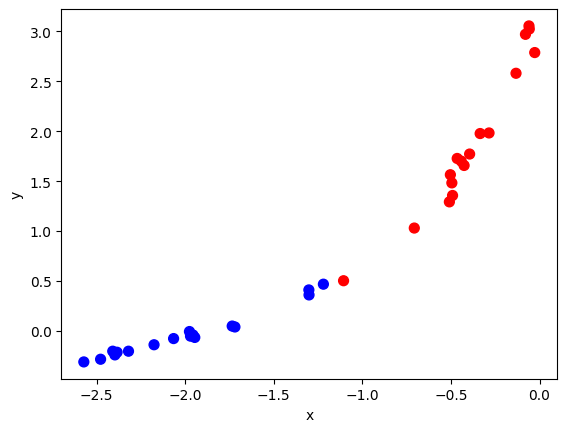

In [6]:
# Nodes who stayed with the Mr. Hi will be plotted in red, while nodes
# who moved with the Officer will be plotted in blue
colors = ['red' if x == 'Mr. Hi' else 'blue' for x in df.club]
df.plot.scatter(x='x', y='y', s=50, c=colors)

If our example trained correctly, you should notice a clear separation between the blue and red nodes.  Solely from the graph structure, node2vec could predict how the Zachary's Karate Club split!

Tune the hyperparameters ```p``` and ```q```, and notice how they affect the resulting embeddings.

### Your Task

Now we will study the behavior of node2vec on [barbell graphs](https://en.wikipedia.org/wiki/Barbell_graph).

Below you can see a toy example of a barbell graph generated with NetworkX.

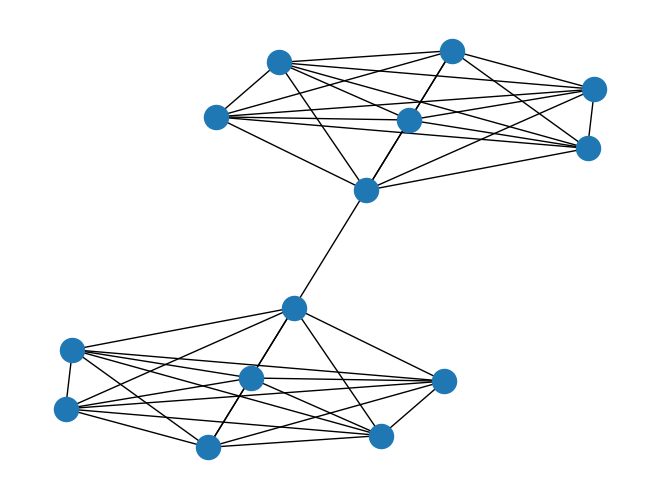

In [7]:
toy_barbell = nx.barbell_graph(7, 0)
nx.draw_kamada_kawai(toy_barbell)

Generate a larger barbell graph, where each complete graph has exactly 1000 nodes.

Then, learn node2vec embeddings on this graph, setting ```p = 1, q = 1``` and ```d = 10```.

In [8]:
import networkx as nx

# Creation of barbell graph with 2 cliques of 1000 nodes
barbell_1 = nx.barbell_graph(1000, 0)
print(f"Number of nodes: {barbell_1.number_of_nodes()}")
print(f"Number of edges: {barbell_1.number_of_edges()}")
print(f"Graph density: {nx.density(barbell_1)}")

# Instantiate Node2VecNew with setting parameters  setting p = 1, q = 1 and d = 10
node2vec = Node2VecNew(p=1, q=1, d=10)

# Fit the model to learn embeddings on created barbell_1 graph
embeddings = node2vec.fit_transform(barbell_1)


Number of nodes: 2000
Number of edges: 999001
Graph density: 0.4997503751875938
Making walks... Done, T=2.00
Mapping Walk Names... Done, T=0.50
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=24.02


Write a function that takes as input a node id ```n``` in the graph (e.g., ```5```) and returns a list containining the cosine similarity between the node2vec vector of the input node ```n``` and all the nodes in the given barbell graph (including the similarity with ```n``` itself).

In [9]:
''' 24-30 lines of code in total expected but can differ based on your style.
For sub-parts of the question (if any), creating different cells of code would be recommended.'''

# YOUR CODE HERE
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def cosine_similarity_with_all_nodes(n, embeddings):
    """
    Calculate cosine similarity between the embedding of node n and all nodes in the graph.

    Parameters:
    n (int): Node ID for which to calculate similarity.
    embeddings (np.ndarray): Matrix of node embeddings where each row corresponds to a node.

    Returns:
    list: List of cosine similarity scores between node n and all nodes.
    """
    # Extract the embedding vector for node n
    node_embedding = embeddings[n].reshape(1, -1)  # Reshape for compatibility

    # Calculate cosine similarity between node n's embedding and all other embeddings
    similarities = cosine_similarity(node_embedding, embeddings).flatten()

    return similarities.tolist()

# Example usage
# Assume we have a trained embeddings matrix (e.g., obtained from node2vec)
# Let's simulate some embeddings for demonstration
embeddings = np.random.rand(2000, 10)  # For a graph with 2000 nodes and 10-dimensional embeddings

# Calculate cosine similarities for node with ID 5
similarities = cosine_similarity_with_all_nodes(5, embeddings)
print("Cosine similarities for node 5:", similarities)




Cosine similarities for node 5: [0.6399974687918597, 0.659622858664655, 0.6993936439577246, 0.7051543655503053, 0.7210357660170567, 1.0, 0.72459977007197, 0.6165328238103394, 0.8198372429673165, 0.7881689552513256, 0.83335948265064, 0.8831266781790499, 0.7948253607255871, 0.6869327861161159, 0.9421810683740106, 0.8164473986788712, 0.8462306809816382, 0.6713092788005272, 0.7115638650980727, 0.8132290213236038, 0.7661831506171126, 0.8331483800943664, 0.7170085884790414, 0.8252865042519208, 0.7861357487891544, 0.8252562471856553, 0.7991512317082767, 0.7561603046869312, 0.6516975877355514, 0.7709278588181863, 0.8483355864548225, 0.81572679571418, 0.8528367724618722, 0.8154974744830813, 0.7488931589253772, 0.6765927372817916, 0.8216111696742738, 0.7607322141908435, 0.6945281508012651, 0.7621095418455509, 0.8929570488738594, 0.706308085639396, 0.6448490653909992, 0.8148103133925093, 0.9142912918255427, 0.9100337453085124, 0.8004958286940469, 0.7313300954209792, 0.8008191368452742, 0.69081865

Generate another barbell graph, this time adding a path of length 51 between

---

the two complete graphs. To find out how, refer to the NetworkX documentation: [https://networkx.github.io/documentation/stable/reference/

---

generated/networkx.generators.classic.barbell_graph.html#networkx.generators.classic.barbell_graph](https://networkx.github.io/documentation/stable/reference/generated/networkx.generators.classic.barbell_graph.html#networkx.generators.classic.barbell_graph)

Learn the node2vec embeddings for the nodes of this new graph, using the same hyperparameters as before.

In [10]:
''' 10-12 lines of code in total expected but can differ based on your style.
For sub-parts of the question (if any), creating different cells of code would be recommended.'''
# YOUR CODE HERE
import networkx as nx

# Creation of barbell graph with a path of length 51 b/w 2 complete graphs
barbell_2 = nx.barbell_graph(1000, 51)

print(f"Number of nodes: {barbell_2.number_of_nodes()}")
print(f"Number of edges: {barbell_2.number_of_edges()}")
print(f"Graph density: {nx.density(barbell_2)}")

# Instantiate Node2VecNew with the same setteings as used earlier
node2vec = Node2VecNew(p=1, q=1, d=10)

# Node2vec embeddings for the new graph
embeddings = node2vec.fit_transform(barbell_2)

# Print embeddings for the first few nodes
print(embeddings[:5])


Number of nodes: 2051
Number of edges: 999052
Graph density: 0.47522422137922016
Making walks... Done, T=1.78
Mapping Walk Names... Done, T=0.93
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=22.81
[[-0.22629647  0.23391299  0.7645291   0.05928755 -0.62104374  1.3857135
  -0.48712718  0.8885831  -1.0202713  -1.0914958 ]
 [-0.3926524   0.36627662  0.5730786  -0.10096309 -0.31974837  1.3583888
  -0.6859217   0.61765885 -1.2846243  -1.138783  ]
 [-0.21718168  0.47699952  0.53974617  0.00505793 -0.67379093  1.6565424
  -0.65233487  0.61036056 -0.95030195 -1.0595883 ]
 [ 0.01512999 -0.07937113  0.8293674   0.3222408  -0.39949486  1.248326
  -0.6841144   0.6486988  -1.3219906  -1.2676208 ]
 [-0.67975515 -0.03017133  0.24428257  0.04876999 -0.6793451   1.6293914
  -0.70548314  0.7137986  -0.68830585 -1.317867  ]]


Once you have working code for each cell above, **head over to Gradescope, read carefully the questions, and submit your solution for this Colab**!
